In [58]:
'''





'''


import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats



In [36]:
df_parking_citations = pd.DataFrame(data = pd.read_csv('input/parking_citations.corrupted.csv'))

df_parking_citations

C:\Users\bijan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6.439998e+06,1.802686e+06
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6.440041e+06,1.802686e+06
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,9.999900e+04,9.999900e+04
5,1106226590,2015-09-15T00:00:00,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,9.999900e+04,9.999900e+04
7,1106500463,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201602.0,NaN,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,9.999900e+04,9.999900e+04
8,1106506402,2015-12-22T00:00:00,945.0,NaN,NaN,CA,201605.0,NaN,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04
9,1106506413,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201701.0,NaN,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04


In [37]:
# Data Manipulations

df_parking_citations

# Drop the datapoint with Null value in the following 10 columns with number of null values less than 40'000 
# Effecting less than 1% of the whole training and validation data points
df_parking_citations = df_parking_citations.dropna(     axis = 'index', 
                                                        subset = 
                                                                ['Issue time', 
                                                                 'RP State Plate', 
                                                                 'Body Style', 
                                                                 'Color', 
                                                                 'Location',
                                                                 'Route',
                                                                 'Agency', 
                                                                 'Violation Description', 
                                                                 'Fine amount', 
                                                                 'Latitude', 
                                                                 'Longitude']
                                                  )


# Drop the whole column for the following columns due to the high number of null value and noises especially  'VIN'
df_parking_citations = df_parking_citations.drop(   columns = 
                                                                 ['Meter Id',
                                                                  'Marked Time',
                                                                  'VIN'                                            
                                                                 ]
                                                )

# Filling the Plate Expiry Date with the constant value of 202012 assuming the States have 3 years expiry date program
df_parking_citations['Plate Expiry Date'].fillna(value= 202012.00, inplace= True )

# Some Ticket number contains a letter D at the end of them which 
# shows that those ticket number were deleted or meant to be deleted
# Remove those letter for the porpuse of this analytics
df_parking_citations['Ticket number'] = df_parking_citations['Ticket number'].astype(str).str.replace('D', '')


# Change the data type from object to time stamp for Issue Date
# TODO: with Issue Date we can identify day of week, weekend or weekdays, and holiday to expand 
df_parking_citations['Issue Date'] =  pd.to_datetime(df_parking_citations['Issue Date'], format='%Y-%m-%dT%H:%M:%S')

# Identify the ticket issuance time of Day: AM: Morning or PM: Afternoon 
df_parking_citations['Time of Day'] =  [ 'AM' if x < 1200 else 'PM' for x in df_parking_citations['Issue time']]


df_parking_citations


,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Time of Day
0,1103341116,2015-12-21,1251.0,CA,200304.0,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,PM
1,1103700150,2015-12-21,1435.0,CA,201512.0,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,PM
2,1104803000,2015-12-21,2055.0,CA,201503.0,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6.439998e+06,1.802686e+06,PM
4,1105461453,2015-09-15,115.0,CA,200316.0,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,9.999900e+04,9.999900e+04,AM
5,1106226590,2015-09-15,19.0,CA,201507.0,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,AM
6,1106500452,2015-12-17,1710.0,CA,201605.0,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,9.999900e+04,9.999900e+04,PM
7,1106500463,2015-12-17,1710.0,CA,201602.0,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,9.999900e+04,9.999900e+04,PM
8,1106506402,2015-12-22,945.0,CA,201605.0,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04,AM
9,1106506413,2015-12-22,1100.0,CA,201701.0,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04,AM
10,1106506424,2015-12-22,1100.0,CA,201511.0,FORD,TR,WH,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,9.999900e+04,9.999900e+04,AM


In [16]:
df_parking_citations.isnull().sum()

Ticket number                  0
Issue Date                     0
Issue time                     0
RP State Plate                 0
Plate Expiry Date              0
Make                     4325439
Body Style                     0
Color                          0
Location                       0
Route                          0
Agency                         0
Violation code                 0
Violation Description          0
Fine amount                    0
Latitude                       0
Longitude                      0
Time of Day                    0
dtype: int64

In [17]:
df_parking_citations.isnull().mean().round(4)*100

Ticket number             0.00
Issue Date                0.00
Issue time                0.00
RP State Plate            0.00
Plate Expiry Date         0.00
Make                     50.05
Body Style                0.00
Color                     0.00
Location                  0.00
Route                     0.00
Agency                    0.00
Violation code            0.00
Violation Description     0.00
Fine amount               0.00
Latitude                  0.00
Longitude                 0.00
Time of Day               0.00
dtype: float64

In [18]:
# Categorical boolean mask
categorical_feature_mask = df_parking_citations.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_parking_citations.columns[categorical_feature_mask].tolist()
categorical_cols


['Ticket number',
 'RP State Plate',
 'Make',
 'Body Style',
 'Color',
 'Location',
 'Route',
 'Violation code',
 'Violation Description',
 'Time of Day']

In [19]:
categorical_cols = ['RP State Plate', 'Body Style' , 'Color', 'Location', 'Route', 'Violation code' , 'Violation Description', 'Time of Day']

In [20]:
#Labeling/Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_encode = df_parking_citations

df_encode[categorical_cols] = df_encode[categorical_cols].apply(lambda col: le.fit_transform(col))

df_encode


,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Time of Day
0,1103341116,2015-12-21,1251.0,7,200304.0,NaN,105,31,247770,1100,1.0,106,191,50.0,9.999900e+04,9.999900e+04,1
1,1103700150,2015-12-21,1435.0,7,201512.0,NaN,166,89,1001766,3369,1.0,106,191,50.0,9.999900e+04,9.999900e+04,1
2,1104803000,2015-12-21,2055.0,7,201503.0,NaN,105,11,530418,4661,2.0,277,313,58.0,6.439998e+06,1.802686e+06,1
4,1105461453,2015-09-15,115.0,7,200316.0,CHEV,105,11,1453692,3470,1.0,208,204,93.0,9.999900e+04,9.999900e+04,0
5,1106226590,2015-09-15,19.0,7,201507.0,NaN,166,31,1475996,3280,1.0,106,191,50.0,9.999900e+04,9.999900e+04,0
6,1106500452,2015-12-17,1710.0,7,201605.0,MAZD,105,12,1479028,178,1.0,219,219,163.0,9.999900e+04,9.999900e+04,1
7,1106500463,2015-12-17,1710.0,7,201602.0,NaN,105,11,1479028,178,1.0,219,219,163.0,9.999900e+04,9.999900e+04,1
8,1106506402,2015-12-22,945.0,7,201605.0,NaN,105,14,1220276,4313,1.0,210,199,93.0,9.999900e+04,9.999900e+04,0
9,1106506413,2015-12-22,1100.0,7,201701.0,NaN,105,65,142873,4313,1.0,210,199,93.0,9.999900e+04,9.999900e+04,0
10,1106506424,2015-12-22,1100.0,7,201511.0,FORD,147,89,142873,4313,1.0,210,199,93.0,9.999900e+04,9.999900e+04,0


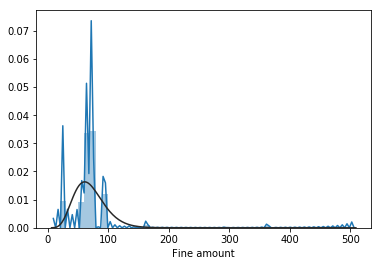

In [69]:
#Normalization of the 'Fine amount'

## Exploring the fine amount distribution
## Looking at the data it has a density around mean $70 (with standard deviation $32) and the lowest amount of fine observed is $10
## but really high values such as +$500 are also recorded. 
## Is the Fine amount fit the Gamma distribution as most of similar pricing/charging distribution?

x= df_parking_citations['Fine amount']

# using seaborn and stats to plot the distribution and test 
sns.distplot(x, kde=True, fit=stats.gamma)


In [70]:
# Normalization to using Min-Max Scaler
df_encode['Fine amount'] = (x-x.min())/(x.max()-x.min())

In [77]:
df_encode.dtypes

Ticket number                    object
Issue Date               datetime64[ns]
Issue time                      float64
RP State Plate                    int32
Plate Expiry Date               float64
Make                             object
Body Style                        int32
Color                             int32
Location                          int32
Route                             int32
Agency                          float64
Violation code                    int32
Violation Description             int32
Fine amount                     float64
Latitude                        float64
Longitude                       float64
Time of Day                       int32
dtype: object

In [81]:
# Split the dataframe to two dataframes one for train-test and the other one for prediction based on Make Column
df_train_test = df_encode.dropna(axis = 'index', subset = ['Make'])

df_predict = df_encode[df_encode['Make'].isnull()]



In [82]:
df_train_test[['Ticket number','Plate Expiry Date']].groupby(['Plate Expiry Date'])\
                                                   .agg('count')\
                                                    .sort_values('Plate Expiry Date', ascending = False) \
                                                    .head(100)


,Ticket number
Plate Expiry Date,
501512.0,1
501012.0,1
311807.0,1
301111.0,1
220111.0,2
220110.0,1
220106.0,4
220105.0,2
220102.0,1


In [83]:
df_train_test[['Ticket number','RP State Plate']].groupby(['RP State Plate'])\
                                                 .agg('count')\
                                                 .sort_values('Ticket number', ascending = False) \
                                                 .head(25)

,Ticket number
RP State Plate,
7,4022823
5,38343
63,27134
46,25568
14,18873
70,17050
21,12341
52,11889
9,10880


In [84]:
df_train_test.isnull().sum()

Ticket number            0
Issue Date               0
Issue time               0
RP State Plate           0
Plate Expiry Date        0
Make                     0
Body Style               0
Color                    0
Location                 0
Route                    0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
Time of Day              0
dtype: int64

In [85]:
df_train_test.isnull().mean().round(4)*100

Ticket number            0.0
Issue Date               0.0
Issue time               0.0
RP State Plate           0.0
Plate Expiry Date        0.0
Make                     0.0
Body Style               0.0
Color                    0.0
Location                 0.0
Route                    0.0
Agency                   0.0
Violation code           0.0
Violation Description    0.0
Fine amount              0.0
Latitude                 0.0
Longitude                0.0
Time of Day              0.0
dtype: float64

In [86]:
df_train_test

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Time of Day
4,1105461453,2015-09-15,115.0,7,200316.0,CHEV,105,11,1453692,3470,1.0,208,204,0.167677,9.999900e+04,9.999900e+04,0
6,1106500452,2015-12-17,1710.0,7,201605.0,MAZD,105,12,1479028,178,1.0,219,219,0.309091,9.999900e+04,9.999900e+04,1
10,1106506424,2015-12-22,1100.0,7,201511.0,FORD,147,89,142873,4313,1.0,210,199,0.167677,9.999900e+04,9.999900e+04,0
11,1106506435,2015-12-22,1105.0,7,201701.0,CHRY,105,29,142873,4313,1.0,210,199,0.167677,9.999900e+04,9.999900e+04,0
18,1107539834,2015-09-16,1045.0,7,202012.0,CHEV,105,11,208608,3523,1.0,211,200,0.167677,9.999900e+04,9.999900e+04,0
19,1107780811,2015-12-22,1102.0,7,201606.0,HOND,105,11,1468590,4263,1.0,212,194,0.127273,9.999900e+04,9.999900e+04,0
21,1107973985,2015-12-18,1920.0,7,201509.0,NISS,105,11,1481460,6959,1.0,106,191,0.080808,9.999900e+04,9.999900e+04,1
22,1107973996,2015-12-18,1930.0,7,201511.0,HOND,105,11,1472351,6959,1.0,106,191,0.080808,9.999900e+04,9.999900e+04,1
25,1108311013,2015-12-22,150.0,7,201610.0,FORD,137,31,1187897,1095,1.0,112,160,0.030303,9.999900e+04,9.999900e+04,0
30,1108319494,2015-12-22,135.0,7,201601.0,MBNZ,105,89,201304,1086,1.0,112,160,0.030303,9.999900e+04,9.999900e+04,0


In [18]:
df_predict

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Time of Day
0,1103341116,2015-12-21,1251.0,7,200304.0,NaN,105,31,247770,1100,1.0,106,191,50.0,9.999900e+04,9.999900e+04,1
1,1103700150,2015-12-21,1435.0,7,201512.0,NaN,166,89,1001766,3369,1.0,106,191,50.0,9.999900e+04,9.999900e+04,1
2,1104803000,2015-12-21,2055.0,7,201503.0,NaN,105,11,530418,4661,2.0,277,313,58.0,6.439998e+06,1.802686e+06,1
5,1106226590,2015-09-15,19.0,7,201507.0,NaN,166,31,1475996,3280,1.0,106,191,50.0,9.999900e+04,9.999900e+04,0
7,1106500463,2015-12-17,1710.0,7,201602.0,NaN,105,11,1479028,178,1.0,219,219,163.0,9.999900e+04,9.999900e+04,1
8,1106506402,2015-12-22,945.0,7,201605.0,NaN,105,14,1220276,4313,1.0,210,199,93.0,9.999900e+04,9.999900e+04,0
9,1106506413,2015-12-22,1100.0,7,201701.0,NaN,105,65,142873,4313,1.0,210,199,93.0,9.999900e+04,9.999900e+04,0
12,1106506446,2015-12-22,1110.0,7,201511.0,NaN,105,11,172296,4313,1.0,106,191,50.0,9.999900e+04,9.999900e+04,0
13,1106549754,2015-12-15,825.0,7,201607.0,NaN,147,11,961993,7377,1.0,208,204,93.0,9.999900e+04,9.999900e+04,0
23,1107978852,2015-12-18,1900.0,7,201511.0,NaN,105,65,441859,6941,1.0,106,191,50.0,9.999900e+04,9.999900e+04,1


In [87]:
#Identifying the top 25 common Make using groupby and aggregation methods

df_common_make = df_train_test[['Ticket number','Make']].groupby(['Make']) \
                                                            .agg('count') \
                                                            .sort_values('Ticket number', ascending = False) \
                                                            .head(25)\
                                                            .reset_index()\
                                                            
l_common_make = df_common_make['Make'].tolist()

df_train_test ['Common make'] = [1 if x in l_common_make else 0 for x in df_train_test['Make']]


df_predict['Common make'] = np.nan

C:\Users\bijan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\bijan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:

X_train_test = df_train_test.drop(['Issue Date','Make', 'Common make'],axis =1)
y_train_test = df_train_test['Common make']

In [90]:
X_predict = df_predict.drop(['Issue Date','Make', 'Common make'],axis =1)
y_predict = df_predict['Common make']

In [91]:
## Split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_test,y_train_test, random_state = 200, test_size=0.2)

In [92]:
X_train_test.dtypes


Ticket number             object
Issue time               float64
RP State Plate             int32
Plate Expiry Date        float64
Body Style                 int32
Color                      int32
Location                   int32
Route                      int32
Agency                   float64
Violation code             int32
Violation Description      int32
Fine amount              float64
Latitude                 float64
Longitude                float64
Time of Day                int32
dtype: object

In [93]:
y_train_test.dtypes


dtype('int64')

In [94]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
#check accuracy of our model on the train data
round(knn.score(X_train, y_train),4)

0.9194

In [ ]:
# Checking the accuracy of our model based on the training dataset and labeled feature result in 91.94% accuracy
# State-of-the-art Convolutional Neural Networks may achieve about 95% but KNN yeild an acceptable level of accuracy

In [96]:
#check accuracy of our model on the test data
round(knn.score(X_test, y_test),4)

0.9096

In [ ]:
# The accuracy of the trained modeled decreased to 90.96% due to the selected number of neighbors = 5 which
# can be improved by utilizing higher number of neighborhoods.
# This accuracy would also improve by utilizing K-fold Cross Validation as following

In [ ]:
# Checking the K-fold Cross Validation instead of train-test_split method
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=None)

#train model with cv of 5 
cv_scores = cross_val_score(knn, X_train_test, y_train_test, cv=kfold)
#print each cv score (accuracy) and average them
print(round(cv_scores,4))
print('cv_scores mean:{}'.format(round(np.mean(cv_scores),4)))

In [ ]:
# Cross Validation will increase the accuracy of the model to 89.88%

In [ ]:
# Predicting the target feature based on the text dataset 
yte_predict = knn.predict(X_test)

In [ ]:
# Calculating the accuracy of prediction on the test based on the comparison to the y_test
round(np.mean(yte_predict == y_test),4)

In [ ]:
# Yielded accuracy is falling in the reseanable range from test accuracy  

In [ ]:
#Calculate the probability that a vehicle is made by one of the top 25 common manufacturers on test set

proba_test = knn.predict_proba(X_test)

In [ ]:
# the probability of top 25 common make on the test set
Common_make_proba_test = [round(l.tolist()[1],4) for l in proba_test]
Common_make_proba_test

In [ ]:
round(yte_predict.mean(),4)*100

In [ ]:
list(yte_predict)


In [ ]:
# predict the deleted labels of Make based on k - Nearest Neighbor  (KNN) Classifier

y_predict = knn.predict(X_predict)

In [ ]:
#Calculate the probability that a vehicle is made by one of the top 25 common manufacturers on predict set

proba_predict = knn.predict_proba(X_predict)

In [ ]:
proba_predict

In [ ]:
# the probability of top 25 common make on the test set
Common_make_proba_predict = [round(l.tolist()[1],4) for l in proba_predict]
Common_make_proba_predict

In [ ]:
y_predict.tolist()

In [ ]:
df_predict['Common make'] = y_predict.tolist()
df_predict['Common make Probability'] = Common_make_proba_predict

In [ ]:
df_predict[df_predict['Common make'] == 1]['Common make'].count() / df_predict.count() 

In [ ]:
df_train_test[df_train_test['Common make'] == 0 ].count() / df_train_test.count()

In [ ]:
#Calculate the mean probability that a vehicle is made by one of the top 25 common manufacturers 

y_predict.mean()

In [ ]:
# Calculating the Percent of Common Make on Average
round(df_train_test['Common make'].mean(),3)

In [ ]:
df_predict.head(15)


In [ ]:
X_predict.loc[13]

In [ ]:
# Test the prediction process of the single new observation with two samples
X1_predict = X_predict.loc[[13]]    #X_predict.loc[[13]] #X_predict.sample(n=2, random_state=1)
X1_predict

In [ ]:
# Prediction of new observation
y1_predict = knn.predict(X1_predict)
y1_predict 

In [ ]:
# calculating the probability of the new observation being among top 25 common Make
proba_predict1 = knn.predict_proba(X1_predict)

In [ ]:
Common_make_proba_predict1 = proba_predict1.tolist()